In [21]:
#Cleaned and Merged Datasets: Hotel Bookings with Tourism Data based on Country
#merged dataframe: hotel_tourism_df

In [2]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
#File to load
hotel_bookings_file = Path("../Resources/hotel_bookings_dataset.csv")
tourism_file = Path("../Resources/tourism_dataset.csv")

#Read file and store into Pandas DataFrames
hotel_data = pd.read_csv(hotel_bookings_file)
tourism_data = pd.read_csv(tourism_file)


In [4]:
#Cleaning Hotel_Data Dataframe
# Remove specified columns from the hotel_data DataFrame
columns_to_remove = [
    'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
    'market_segment', 'distribution_channel', 'previous_bookings_not_canceled',
    'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type',
    'agent', 'company', 'days_in_waiting_list', 'customer_type',
    'required_car_parking_spaces', 'total_of_special_requests',
    'reservation_status', 'reservation_status_date', 'is_canceled', 'lead_time',
    'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations'
]

hotel_data = hotel_data.drop(columns=columns_to_remove)
hotel_data.head()

,hotel,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,country,adr
0,Resort Hotel,2015,July,0,0,PRT,0.0
1,Resort Hotel,2015,July,0,0,PRT,0.0
2,Resort Hotel,2015,July,0,1,GBR,75.0
3,Resort Hotel,2015,July,0,1,GBR,75.0
4,Resort Hotel,2015,July,0,2,GBR,98.0


In [5]:
# Combine 'stays_in_weekend_nights' and 'stays_in_week_nights' into a new column 'total_stays_days'
hotel_data['total_stays_days'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']
hotel_data = hotel_data.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights'])

# Display the updated hotel_data DataFrame
hotel_data


,hotel,arrival_date_year,arrival_date_month,country,adr,total_stays_days
0,Resort Hotel,2015,July,PRT,0.00,0
1,Resort Hotel,2015,July,PRT,0.00,0
2,Resort Hotel,2015,July,GBR,75.00,1
3,Resort Hotel,2015,July,GBR,75.00,1
4,Resort Hotel,2015,July,GBR,98.00,2
...,...,...,...,...,...,...
119385,City Hotel,2017,August,BEL,96.14,7
119386,City Hotel,2017,August,FRA,225.43,7
119387,City Hotel,2017,August,DEU,157.71,7
119388,City Hotel,2017,August,GBR,104.40,7


In [6]:
# Rearrange the hotel_data columns
columns_order = [
    'country', 'adr','arrival_date_year', 'arrival_date_month', 'total_stays_days', 'hotel'
] + [col for col in hotel_data.columns if col not in ['country', 'adr', 'arrival_date_year', 'arrival_date_month', 'total_stays_days', 'hotel']]

hotel_data = hotel_data[columns_order]

# Rename hotel_data columns
hotel_data = hotel_data.rename(columns={
    'country':'Country',
    'adr': 'Average daily rate',
    'hotel': 'Hotel type',
    'arrival_date_year': 'Arrival Year',
    'arrival_date_month': 'Arrival Month',
    'total_stays_days': 'Total Days of Stays'
})

hotel_data


,Country,Average daily rate,Arrival Year,Arrival Month,Total Days of Stays,Hotel type
0,PRT,0.00,2015,July,0,Resort Hotel
1,PRT,0.00,2015,July,0,Resort Hotel
2,GBR,75.00,2015,July,1,Resort Hotel
3,GBR,75.00,2015,July,1,Resort Hotel
4,GBR,98.00,2015,July,2,Resort Hotel
...,...,...,...,...,...,...
119385,BEL,96.14,2017,August,7,City Hotel
119386,FRA,225.43,2017,August,7,City Hotel
119387,DEU,157.71,2017,August,7,City Hotel
119388,GBR,104.40,2017,August,7,City Hotel


In [7]:
#convert abbreviation to country name in the hotel_data dataframe
country_mapping = {
    'PRT': 'Portugal',
    'GBR': 'United Kingdom',
    'USA': 'United States',
    'ESP': 'Spain',
    'IRL': 'Ireland',
    'FRA': 'France',
    'ROU': 'Romania',
    'NOR': 'Norway',
    'OMN': 'Oman',
    'ARG': 'Argentina',
    'POL': 'Poland',
    'DEU': 'Germany',
    'BEL': 'Belgium',
    'CHE': 'Switzerland',
    'CN': 'China',
    'GRC': 'Greece',
    'ITA': 'Italy',
    'NLD': 'Netherlands',
    'DNK': 'Denmark',
    'RUS': 'Russia',
    'SWE': 'Sweden',
    'AUS': 'Australia',
    'EST': 'Estonia',
    'CZE': 'Czech Republic',
    'BRA': 'Brazil',
    'FIN': 'Finland',
    'MOZ': 'Mozambique',
    'BWA': 'Botswana',
    'LUX': 'Luxembourg',
    'SVN': 'Slovenia',
    'ALB': 'Albania',
    'IND': 'India',
    'CHN': 'China',
    'MEX': 'Mexico',
    'MAR': 'Morocco',
    'UKR': 'Ukraine',
    'SMR': 'San Marino',
    'LVA': 'Latvia',
    'PRI': 'Puerto Rico',
    'SRB': 'Serbia',
    'CHL': 'Chile',
    'AUT': 'Austria',
    'BLR': 'Belarus',
    'LTU': 'Lithuania',
    'TUR': 'Turkey',
    'ZAF': 'South Africa',
    'AGO': 'Angola',
    'ISR': 'Israel',
    'CYM': 'Cayman Islands',
    'ZMB': 'Zambia',
    'CPV': 'Cape Verde',
    'ZWE': 'Zimbabwe',
    'DZA': 'Algeria',
    'KOR': 'South Korea',
    'CRI': 'Costa Rica',
    'HUN': 'Hungary',
    'ARE': 'United Arab Emirates',
    'TUN': 'Tunisia',
    'JAM': 'Jamaica',
    'HRV': 'Croatia',
    'HKG': 'Hong Kong',
    'IRN': 'Iran',
    'GEO': 'Georgia',
    'AND': 'Andorra',
    'GIB': 'Gibraltar',
    'URY': 'Uruguay',
    'JEY': 'Jersey',
    'CAF': 'Central African Republic',
    'CYP': 'Cyprus',
    'COL': 'Colombia',
    'GGY': 'Guernsey',
    'KWT': 'Kuwait',
    'NGA': 'Nigeria',
    'MDV': 'Maldives',
    'VEN': 'Venezuela',
    'SVK': 'Slovakia',
    'FJI': 'Fiji',
    'KAZ': 'Kazakhstan',
    'PAK': 'Pakistan',
    'IDN': 'Indonesia',
    'LBN': 'Lebanon',
    'PHL': 'Philippines',
    'SEN': 'Senegal',
    'SYC': 'Seychelles',
    'AZE': 'Azerbaijan',
    'BHR': 'Bahrain',
    'NZL': 'New Zealand',
    'THA': 'Thailand',
    'DOM': 'Dominican Republic',
    'MKD': 'North Macedonia',
    'MYS': 'Malaysia',
    'ARM': 'Armenia',
    'JPN': 'Japan',
    'LKA': 'Sri Lanka',
    'CUB': 'Cuba',
    'CMR': 'Cameroon',
    'BIH': 'Bosnia and Herzegovina',
    'MUS': 'Mauritius',
    'COM': 'Comoros',
    'SUR': 'Suriname',
    'UGA': 'Uganda',
    'BGR': 'Bulgaria',
    'CIV': 'Ivory Coast',
    'JOR': 'Jordan',
    'SYR': 'Syria',
    'SGP': 'Singapore',
    'BDI': 'Burundi',
    'SAU': 'Saudi Arabia',
    'VNM': 'Vietnam',
    'PLW': 'Palau',
    'QAT': 'Qatar',
    'EGY': 'Egypt',
    'PER': 'Peru',
    'MLT': 'Malta',
    'MWI': 'Malawi',
    'ECU': 'Ecuador',
    'MDG': 'Madagascar',
    'ISL': 'Iceland',
    'UZB': 'Uzbekistan',
    'NPL': 'Nepal',
    'BHS': 'Bahamas',
    'MAC': 'Macau',
    'TGO': 'Togo',
    'TWN': 'Taiwan',
    'DJI': 'Djibouti',
    'STP': 'Sao Tome and Principe',
    'KNA': 'Saint Kitts and Nevis',
    'ETH': 'Ethiopia',
    'IRQ': 'Iraq',
    'HND': 'Honduras',
    'RWA': 'Rwanda',
    'KHM': 'Cambodia',
    'MCO': 'Monaco',
    'BGD': 'Bangladesh',
    'IMN': 'Isle of Man',
    'TJK': 'Tajikistan',
    'NIC': 'Nicaragua',
    'BEN': 'Benin',
    'VGB': 'British Virgin Islands',
    'TZA': 'Tanzania',
    'GAB': 'Gabon',
    'GHA': 'Ghana',
    'TMP': 'Timor-Leste',
    'GLP': 'Guadeloupe',
    'KEN': 'Kenya',
    'LIE': 'Liechtenstein',
    'GNB': 'Guinea-Bissau',
    'MNE': 'Montenegro',
    'UMI': 'United States Minor Outlying Islands',
    'MYT': 'Mayotte',
    'FRO': 'Faroe Islands',
    'MMR': 'Myanmar',
    'PAN': 'Panama',
    'BFA': 'Burkina Faso',
    'LBY': 'Libya',
    'MLI': 'Mali',
    'NAM': 'Namibia',
    'BOL': 'Bolivia',
    'PRY': 'Paraguay',
    'BRB': 'Barbados',
    'ABW': 'Aruba',
    'AIA': 'Anguilla',
    'SLV': 'El Salvador',
    'DMA': 'Dominica',
    'PYF': 'French Polynesia',
    'GUY': 'Guyana',
    'LCA': 'Saint Lucia',
    'ATA': 'Antarctica',
    'GTM': 'Guatemala',
    'ASM': 'American Samoa',
    'MRT': 'Mauritania',
    'NCL': 'New Caledonia',
    'KIR': 'Kiribati',
    'SDN': 'Sudan',
    'ATF': 'French Southern Territories',
    'SLE': 'Sierra Leone',
    'LAO': 'Laos',
}

# Replace initials with full country names
hotel_data['Country'] = hotel_data['Country'].replace(country_mapping)

In [8]:
#combine the data into single dataframe
hotel_tourism_df = pd.merge(hotel_data, tourism_data, how="left", on="Country")

#display data
hotel_tourism_df

,Country,Average daily rate,Arrival Year,Arrival Month,Total Days of Stays,Hotel type,Location,Category,Visitors,Rating,Revenue,Accommodation_Available
0,Portugal,0.00,2015,July,0,Resort Hotel,NaN,NaN,NaN,NaN,NaN,NaN
1,Portugal,0.00,2015,July,0,Resort Hotel,NaN,NaN,NaN,NaN,NaN,NaN
2,United Kingdom,75.00,2015,July,1,Resort Hotel,NaN,NaN,NaN,NaN,NaN,NaN
3,United Kingdom,75.00,2015,July,1,Resort Hotel,NaN,NaN,NaN,NaN,NaN,NaN
4,United Kingdom,98.00,2015,July,2,Resort Hotel,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13252697,France,225.43,2017,August,7,City Hotel,IfKotyaJFC,Nature,276317.0,3.53,325183.96,Yes
13252698,France,225.43,2017,August,7,City Hotel,gHXUrdticm,Cultural,40939.0,4.65,957026.85,Yes
13252699,Germany,157.71,2017,August,7,City Hotel,NaN,NaN,NaN,NaN,NaN,NaN
13252700,United Kingdom,104.40,2017,August,7,City Hotel,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Remove specified columns from the DataFrame
hotel_tourism_df_clean = [
    'Location', 'Category', 'Accommodation_Available','Visitors','Rating','Revenue']

hotel_tourism_df = hotel_tourism_df.drop(columns=hotel_tourism_df_clean)
hotel_tourism_df.head()


,Country,Average daily rate,Arrival Year,Arrival Month,Total Days of Stays,Hotel type
0,Portugal,0.0,2015,July,0,Resort Hotel
1,Portugal,0.0,2015,July,0,Resort Hotel
2,United Kingdom,75.0,2015,July,1,Resort Hotel
3,United Kingdom,75.0,2015,July,1,Resort Hotel
4,United Kingdom,98.0,2015,July,2,Resort Hotel


In [13]:
# Define the desired order of the months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert 'arrival_month' to a categorical type with the specified order
hotel_data['Arrival Month'] = pd.Categorical(hotel_data['Arrival Month'], categories=month_order, ordered=True)

# Group data by 'arrival_date_month' and calculate the average daily rate
average_rate_by_month = hotel_data.groupby('Arrival Month')['Average daily rate'].mean().reset_index()

# Rename the columns for clarity
average_rate_by_month.columns = ['Arrival Month', 'Average daily rate']


# Display the resulting DataFrame
average_rate_by_month


 

C:\Users\kelvi\AppData\Local\Temp\ipykernel_12256\1247559965.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rate_by_month = hotel_data.groupby('Arrival Month')['Average daily rate'].mean().reset_index()


,Arrival Month,Average daily rate
0,January,70.361241
1,February,73.582276
2,March,80.679646
3,April,100.380790
4,May,108.695516
5,June,116.672192
6,July,126.788013
7,August,140.111523
8,September,105.049657
9,October,87.908879


In [24]:
# Ensure seasons are mapped correctly
seasons = {
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn'
}

# Add a 'Season' column
hotel_data['Season'] = hotel_data['Arrival Month'].map(seasons)

# Group by Year and Season
seasonal_trends_yearly = hotel_data.groupby(['Arrival Year', 'Season']).agg({
    'Average daily rate': 'mean',
    'Total Days of Stays': 'sum'
}).reset_index()

# Ensure seasons are in correct order
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_trends_yearly['Season'] = pd.Categorical(
    seasonal_trends_yearly['Season'], 
    categories=season_order, 
    ordered=True
)

# Sort data for plotting
seasonal_trends_yearly = seasonal_trends_yearly.sort_values(['Arrival Year', 'Season'])

# Display the calculated trends
seasonal_trends_yearly


,Arrival Year,Season,Average daily rate,Total Days of Stays
2,2015,Winter,74.079243,8873
1,2015,Summer,102.553964,25140
0,2015,Autumn,82.003470,40575
6,2016,Winter,75.182995,30331
4,2016,Spring,88.503345,50527
5,2016,Summer,124.828132,55957
3,2016,Autumn,97.722435,52404
9,2017,Winter,75.396791,24718
7,2017,Spring,105.805609,58931
8,2017,Summer,143.470951,61801


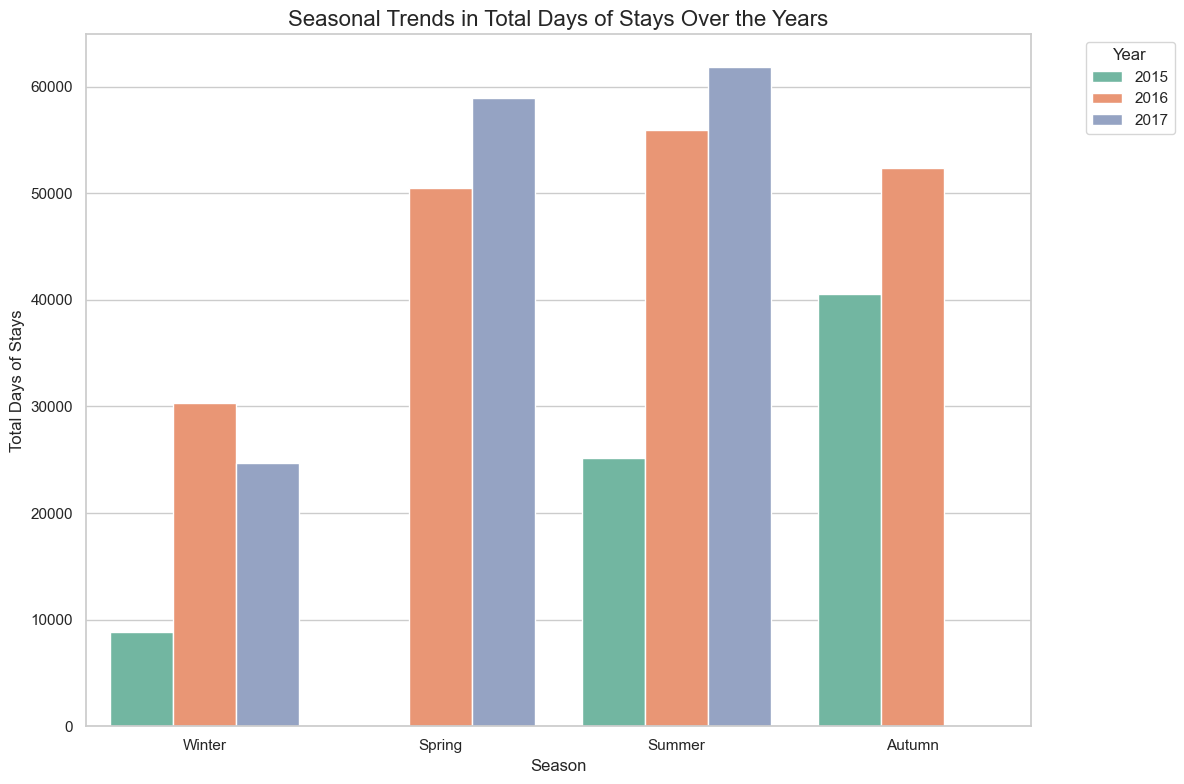

In [25]:
# Bar plot for seasonal total stays over years
plt.figure(figsize=(12, 8))
sns.barplot(
    data=seasonal_trends_yearly, 
    x='Season', 
    y='Total Days of Stays', 
    hue='Arrival Year', 
    palette='Set2'
)

# Add labels and title
plt.title("Seasonal Trends in Total Days of Stays Over the Years", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Total Days of Stays", fontsize=12)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [14]:
# Define a mapping of months to seasons
seasons = {
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn'
}

# Add a 'Season' column based on the mapping
hotel_data['Season'] = hotel_data['Arrival Month'].map(seasons)

# Group by season and calculate average daily rate and total stays
seasonal_trends = hotel_data.groupby('Season').agg({
    'Average daily rate': 'mean',
    'Total Days of Stays': 'sum'
}).reset_index()

# Sort by season order
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_trends['Season'] = pd.Categorical(seasonal_trends['Season'], categories=season_order, ordered=True)
seasonal_trends = seasonal_trends.sort_values('Season')

# Display the seasonal trends
seasonal_trends


,Season,Average daily rate,Total Days of Stays
3,Winter,75.108733,63922
1,Spring,97.475909,109458
2,Summer,128.768785,142898
0,Autumn,90.868100,92979


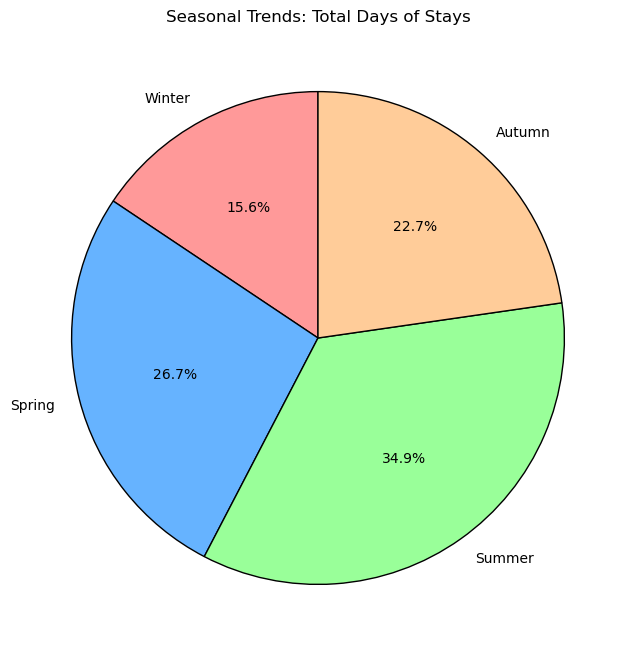

In [15]:
# Data for the pie chart (using total stays as an example)
labels = seasonal_trends['Season']
sizes = seasonal_trends['Total Days of Stays']
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']  # Custom colors for seasons

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',  # Show percentages
    startangle=90,  # Start the first slice at the top
    colors=colors,
    wedgeprops={'edgecolor': 'black'}  # Add black edges for better visibility
)

# Add a title
plt.title("Seasonal Trends: Total Days of Stays")

# Display the pie chart
plt.show()


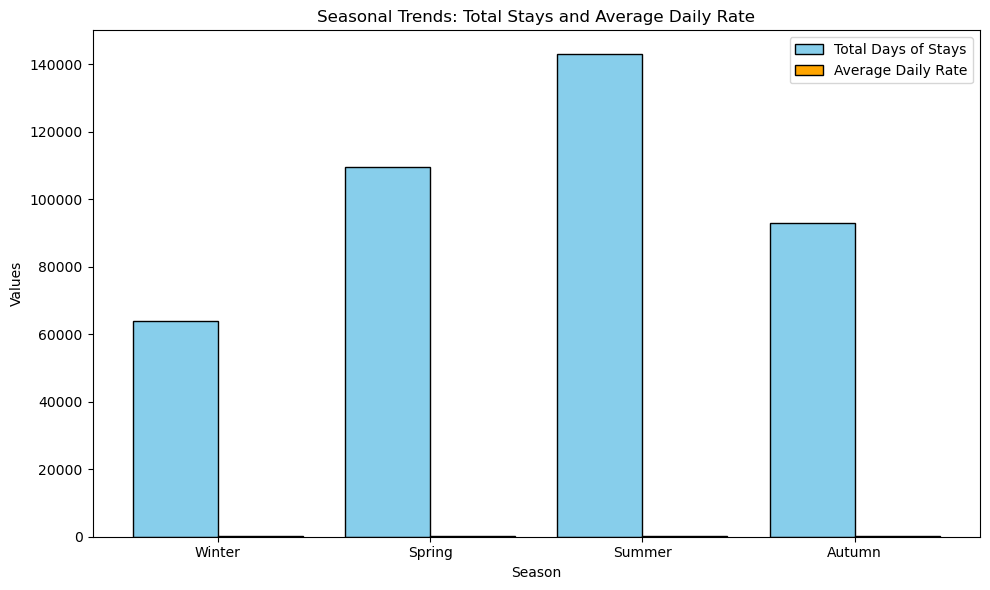

In [16]:
# Data for the bar graph
seasons = seasonal_trends['Season']
total_stays = seasonal_trends['Total Days of Stays']
avg_daily_rate = seasonal_trends['Average daily rate']

# Define the position of bars
x = np.arange(len(seasons))

# Create the bar graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar for total stays
ax1.bar(x - 0.2, total_stays, width=0.4, label='Total Days of Stays', color='skyblue', edgecolor='black')
# Bar for average daily rate
ax1.bar(x + 0.2, avg_daily_rate, width=0.4, label='Average Daily Rate', color='orange', edgecolor='black')

# Add labels, title, and legend
ax1.set_xlabel("Season")
ax1.set_ylabel("Values")
ax1.set_title("Seasonal Trends: Total Stays and Average Daily Rate")
ax1.set_xticks(x)
ax1.set_xticklabels(seasons)
ax1.legend()

# Display the bar graph
plt.tight_layout()
plt.show()


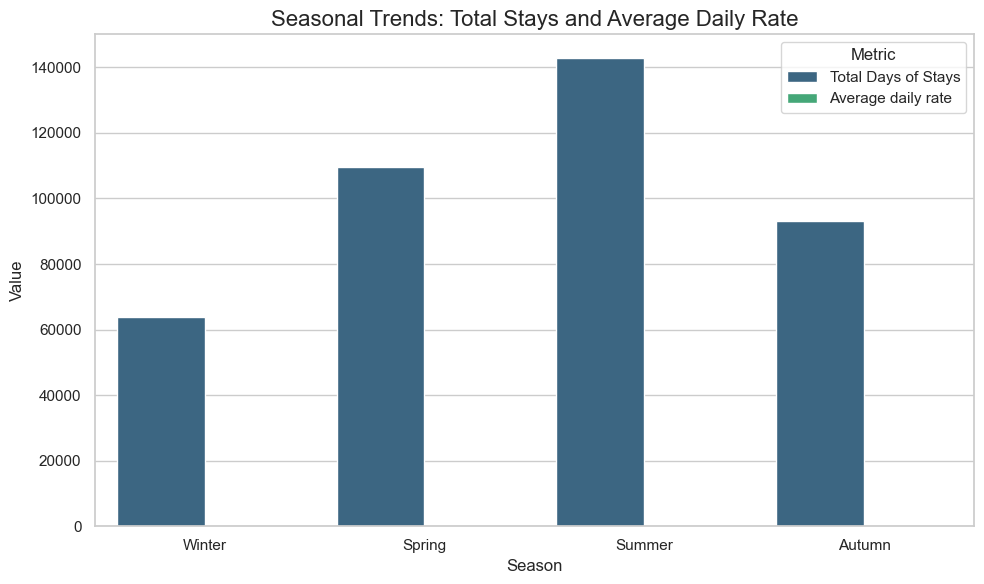

In [21]:
# Melt the data to long format for easier plotting
melted_data = seasonal_trends.melt(id_vars='Season', 
                                   value_vars=['Total Days of Stays', 'Average daily rate'],
                                   var_name='Metric', value_name='Value')

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Season', y='Value', hue='Metric', palette='viridis')

# Add title and labels
plt.title("Seasonal Trends: Total Stays and Average Daily Rate", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Value", fontsize=12)

# Display the bar graph
plt.tight_layout()
plt.show()


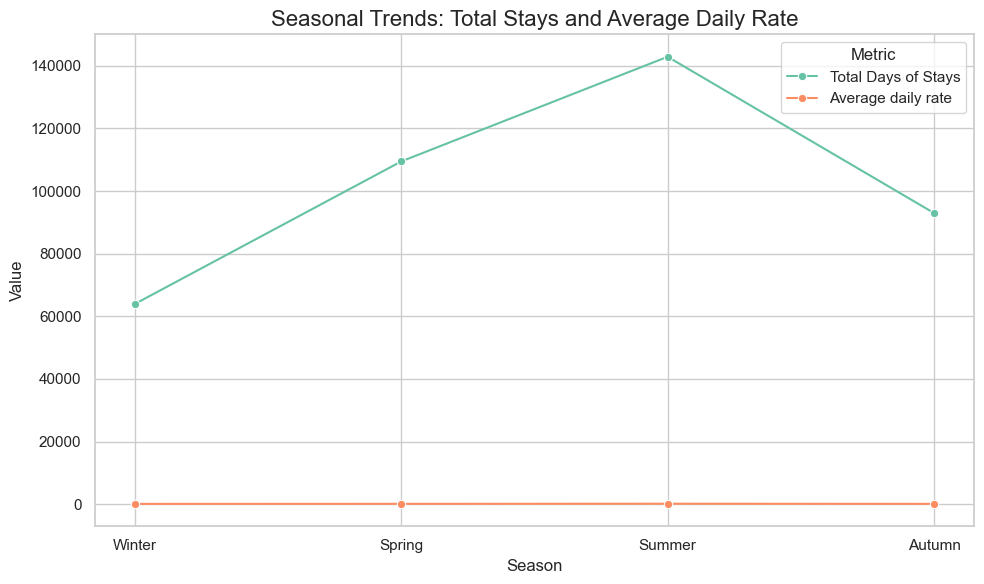

In [22]:
# Melt the data to long format for easier plotting
melted_data = seasonal_trends.melt(id_vars='Season', 
                                   value_vars=['Total Days of Stays', 'Average daily rate'],
                                   var_name='Metric', value_name='Value')

# Ensure the order of seasons is correct
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
melted_data['Season'] = pd.Categorical(melted_data['Season'], categories=season_order, ordered=True)

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_data, x='Season', y='Value', hue='Metric', marker='o', palette='Set2')

# Add title and labels
plt.title("Seasonal Trends: Total Stays and Average Daily Rate", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Value", fontsize=12)

# Display the line plot
plt.tight_layout()
plt.show()
